In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
neighborhoodsFromNeighborScout = pd.read_csv("Ames Neighborhood Rankings.csv")
neighborhoodsFromNeighborScout.rename(columns={"Unnamed: 0": "Neighborhood"}, inplace=True)
neighborhoodsFromNeighborScout.head()

,Neighborhood,BestSchool,Safest,LargestIncomeGrowth,LargestHomeAppreciationSince2000,MostExpensive
0,Edwards,11.0,11.0,3.0,11.0,7.0
1,Ames Northwest,7.0,11.0,5.0,11.0,11.0
2,University Village / Schilletter Village,10.0,3.0,4.0,4.0,11.0
3,Westside / Oak-Wood-Forest,11.0,11.0,7.0,6.0,9.0
4,College Creek,11.0,11.0,2.0,5.0,6.0


The correlation below is supposed to see if we can find a relationship between the various numeric categories. This is more of a sanity check. 

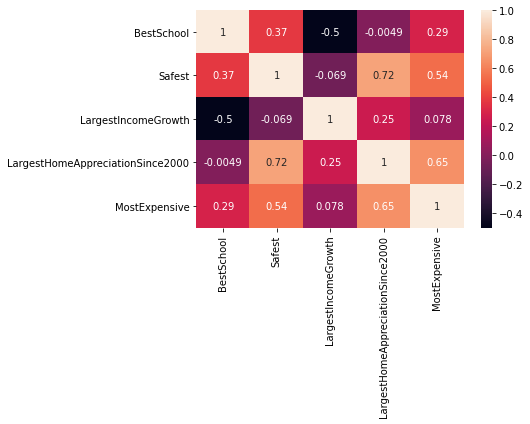

In [3]:
corrMatrix = neighborhoodsFromNeighborScout.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:

tableForJoining = pd.read_csv("TableForJoiningEnvironmentalToPhysical.csv")
tableForJoining = tableForJoining.merge(neighborhoodsFromNeighborScout, how="left", left_on = "Neighborhood Scout Name", right_on = "Neighborhood")
tableForJoining.head()


,Housing DataSet ID,Housing DataSet Name,Neighborhood Scout Name,Neighborhood,BestSchool,Safest,LargestIncomeGrowth,LargestHomeAppreciationSince2000,MostExpensive
0,Blmngtn,Bloomington Heights,Bloomington Heights / Top-O-Hollow,Bloomington Heights / Top-O-Hollow,4.0,7.0,11.0,9.0,3.0
1,Blueste,Bluestem,Timber East / State Ave,Timber East / State Ave,11.0,9.0,11.0,7.0,8.0
2,BrDale,Briardale,Ames Northwest,Ames Northwest,7.0,11.0,5.0,11.0,11.0
3,BrkSide,Brookside,University Village / Schilletter Village,University Village / Schilletter Village,10.0,3.0,4.0,4.0,11.0
4,ClearCr,Clear Creek,Bloomington Heights / Top-O-Hollow,Bloomington Heights / Top-O-Hollow,4.0,7.0,11.0,9.0,3.0


In [5]:
housingDataSet = pd.read_csv("train.csv")
tableForJoining.drop(['Neighborhood', 'Neighborhood Scout Name', 'Housing DataSet Name'], axis=1, inplace=True)
housingDataSet= housingDataSet.merge(tableForJoining, how='left', left_on='Neighborhood', right_on='Housing DataSet ID')
housingDataSet.drop(['Housing DataSet ID'], axis=1, inplace=True)
housingDataSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BestSchool,Safest,LargestIncomeGrowth,LargestHomeAppreciationSince2000,MostExpensive
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,11.0,11.0,2.0,5.0,6.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,1.0,5.0,11.0,11.0,11.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,11.0,11.0,2.0,5.0,6.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,11.0,9.0,11.0,7.0,8.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,2.0,4.0,10.0,3.0,1.0


In [6]:
housingDataSet.to_csv('PhysicalAndEnvironmental.csv')

